<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56 non-null     int64  
 1   Flight Number             56 non-null     int64  
 2   Launch Site               56 non-null     object 
 3   class                     56 non-null     int64  
 4   Payload Mass (kg)         56 non-null     float64
 5   Booster Version           56 non-null     object 
 6   Booster Version Category  56 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.2+ KB
None


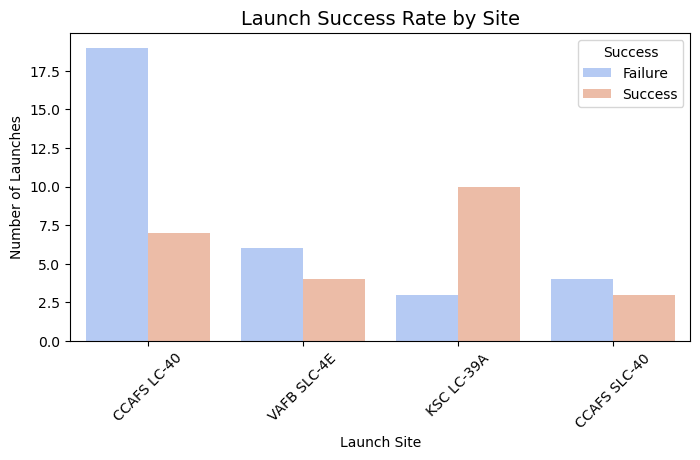

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df = pd.read_csv(dataset_url)

# Afficher la structure du dataset
print(df.info())

# Création du graphique
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Launch Site", hue="class", palette="coolwarm")
plt.title("Launch Success Rate by Site", fontsize=14)
plt.xlabel("Launch Site")
plt.ylabel("Number of Launches")
plt.legend(title="Success", labels=["Failure", "Success"])
plt.xticks(rotation=45)
plt.show()


C:\Users\Razaf\AppData\Local\Temp\ipykernel_9948\1094075964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="Payload Mass (kg)", palette="Set2")


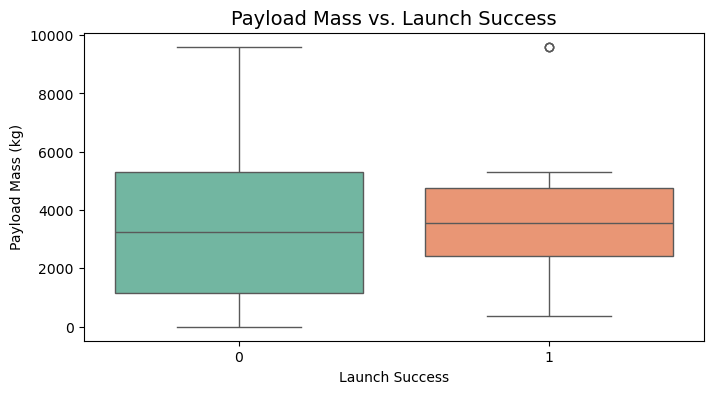

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="class", y="Payload Mass (kg)", palette="Set2")
plt.title("Payload Mass vs. Launch Success", fontsize=14)
plt.xlabel("Launch Success")
plt.ylabel("Payload Mass (kg)")
plt.show()


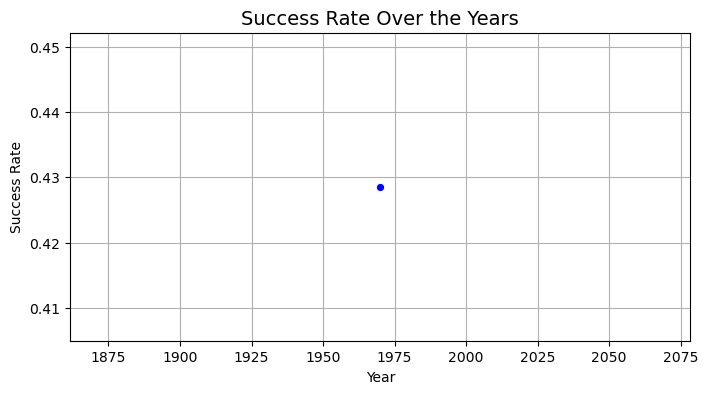

In [38]:
df["LaunchYear"] = pd.to_datetime(df["Flight Number"], errors="coerce").dt.year
success_rate = df.groupby("LaunchYear")["class"].mean()

plt.figure(figsize=(8, 4))
sns.lineplot(x=success_rate.index, y=success_rate.values, marker="o", color="b")
plt.title("Success Rate Over the Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.grid(True)
plt.show()


In [8]:
#Liste des sites de lancement
import sqlite3

# Charger les données dans SQLite
conn = sqlite3.connect(":memory:")  # Créer une base de données en mémoire
df.to_sql("spacex_launch_dash", conn, index=False, if_exists="replace")

# Fonction pour exécuter et afficher les résultats SQL
def run_query(query):
    return pd.read_sql(query, conn)


In [10]:
query = "SELECT DISTINCT `Launch Site` FROM spacex_launch_dash;"
run_query(query)


,Launch Site
0,CCAFS LC-40
1,VAFB SLC-4E
2,KSC LC-39A
3,CCAFS SLC-40


In [12]:
#Nombre total de lancements par site
query = """
SELECT "Launch Site", COUNT(*) as launch_count
FROM spacex_launch_dash
GROUP BY "Launch Site"
ORDER BY launch_count DESC;
"""
run_query(query)


,Launch Site,launch_count
0,CCAFS LC-40,26
1,KSC LC-39A,13
2,VAFB SLC-4E,10
3,CCAFS SLC-40,7


In [14]:
#Taux de succès des lancements par site
query = """
SELECT "Launch Site", AVG(class) as success_rate
FROM spacex_launch_dash
GROUP BY "Launch Site"
ORDER BY success_rate DESC;
"""
run_query(query)


,Launch Site,success_rate
0,KSC LC-39A,0.769231
1,CCAFS SLC-40,0.428571
2,VAFB SLC-4E,0.400000
3,CCAFS LC-40,0.269231


In [18]:
#Impact de la masse de charge utile sur le succès

query = """
SELECT "Payload Mass (kg)", class
FROM spacex_launch_dash
ORDER BY "Payload Mass (kg)" DESC;
"""
run_query(query)

,Payload Mass (kg),class
0,9600.00,1
1,9600.00,1
2,9600.00,1
3,9600.00,0
4,9600.00,0
5,6761.00,0
6,6460.00,0
7,6092.00,0
8,6070.00,0
9,5600.00,0


In [20]:
#Nombre total de succès et d’échecs des missions
query = """
SELECT class, COUNT(*) as count
FROM spacex_launch_dash
GROUP BY class;
"""
run_query(query)


,class,count
0,0,32
1,1,24


In [ ]:
# FOLIUM

In [42]:
import folium
import pandas as pd

# Télécharger les données des sites de lancement
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'
df_geo = pd.read_csv(URL)

# Créer une carte centrée sur les sites de lancement
launch_map = folium.Map(location=[28.5, -80.5], zoom_start=5)

# Ajouter des marqueurs pour chaque site de lancement
for index, row in df_geo.iterrows():
    folium.Marker(
        location=[row["Lat"], row["Long"]],
        popup=row["Launch Site"],
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(launch_map)

# Afficher la carte dans Jupyter
launch_map


In [26]:
launch_map.save("launch_sites_map.html")
print("✅ Carte sauvegardée sous 'launch_sites_map.html'")


✅ Carte sauvegardée sous 'launch_sites_map.html'


In [46]:
# 1️⃣ Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 2️⃣ Télécharger et charger les données
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df = pd.read_csv(dataset_url)

# 3️⃣ Vérifier les colonnes disponibles
print(df.columns)

# 4️⃣ Encoder les variables catégorielles
label_encoder_site = LabelEncoder()
label_encoder_booster = LabelEncoder()

df['Launch_Site_Encoded'] = label_encoder_site.fit_transform(df['Launch Site'])
df['Booster_Version_Encoded'] = label_encoder_booster.fit_transform(df['Booster Version'])

# 5️⃣ Définir les features et la target (variable à prédire)
features = df[['Payload Mass (kg)', 'Launch_Site_Encoded', 'Booster_Version_Encoded']]
target = df['class']  # "class" indique succès (1) ou échec (0)

# 6️⃣ Séparer les données en training et test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 7️⃣ Entraîner le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8️⃣ Prédictions et évaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")


Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')
✅ Model Accuracy: 0.67


In [48]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
df = pd.read_csv(dataset_url)

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Créer le graphique circulaire (Pie Chart)
pie_chart = px.pie(df, names="Launch Site", values="class", title="Launch Success Rate by Site")

# Créer le graphique de dispersion (Scatter Plot)
scatter_plot = px.scatter(df, x="Payload Mass (kg)", y="class", color="Launch Site",
                          title="Payload Mass vs. Launch Success")

# Créer la mise en page de l'application Dash
app.layout = html.Div(children=[
    html.H1("SpaceX Launch Dashboard", style={'textAlign': 'center'}),
    
    html.Div([
        dcc.Graph(id='success-rate-chart', figure=pie_chart),
    ]),

    html.Div([
        dcc.Graph(id='payload-success-chart', figure=scatter_plot),
    ])
])

# Lancer le serveur Dash
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\Razaf\AppData\Local\Temp\ipykernel_9948\3300525977.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Razaf\AppData\Local\Temp\ipykernel_9948\3300525977.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
